
Numerical optimization
======================

Silent substitution can be approached as a [constrained numerical optimization](https://en.wikipedia.org/wiki/Constrained_optimization) problem of the form:

\begin{equation}
\begin{array}{rrclcl}
& \underset{x \in \mathbb{R}^{n}}{\text{minimize}}
&  f(x) \\
& \text{subject to}
& g^{L} \le g(x) \le g^{U} \\
& & x^{L} \le x \le x^{U} ,
\end{array}
\end{equation}

where $x \in \mathbb{R}^{n}$ are the optimization variables (i.e., the primary input weights) whose lower and upper bounds, $x^{L}$ and $x^{U}$, are between 0 and 1 to ensure that the solution is within the gamut of the device, $f(x)$ is the objective function that aims to maximise contrast of the target photoreceptor(s), and $g(x)$ is a constraint function that calculates contrast for the silenced photoreceptor(s), where $g^{L}$ and $g^{U}$ should be zero. In all cases, $x$ is a vector containing the primary input weights. 

`pysilsub.problems.SilentSubstitutionProblem` has an `.optim_solve()` method that uses `SciPy`'s optimisation algorithms to solve a defined problem. By default, it performs a local optimisation with `scipy.optimize.minimize` using the `SLSQP` [sequential quadratic least squares programming](https://docs.scipy.org/doc/scipy-1.8.0/html-scipyorg/reference/optimize.minimize-slsqp.html) solver. 

The objective function, $f(x)$, and the contrast constraint function, $g(x)$, are built into the problem class and are conditioned by the values given to the properties. 


Basic example
-------------

************************************************************
*************** Silent Substitution Problem ****************
************************************************************
Device: STLAB_1 (binocular, left eye)
Observer: ColorimetricObserver(age=32, field_size=10)
Ignoring: ['rh']
Minimising: ['sc', 'mc', 'lc']
Modulating: ['mel']
Target contrast: [ 0.5]
Background: None


~~~~~~~~~~~~~~~~~~~~~~~ optim_solve ~~~~~~~~~~~~~~~~~~~~~~~~
> No background specified, will optimise background.
> Performing local optimization with SLSQP.
 Background settings: [1288, 1111, 0, 0, 926, 1106, 4013, 1111, 1820, 0]
 Modulation settings: [569, 65, 1093, 3328, 2743, 3176, 855, 2266, 4088, 1244]


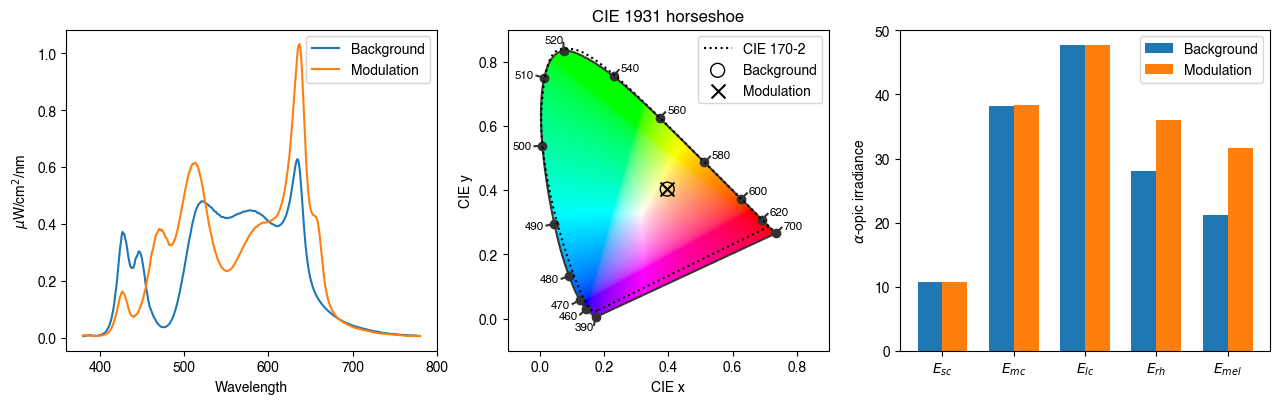

In [1]:
from pysilsub.problems import SilentSubstitutionProblem as SSP

# Instantiate the problem class
ssp = SSP.from_package_data('STLAB_1_York')

# Define problem
ssp.ignore = ['rh']
ssp.target = ['mel']
ssp.silence = ['sc', 'mc', 'lc']
ssp.target_contrast = .5
ssp.print_problem()

# Find solution
solution = ssp.optim_solve(**{'options':{'disp':False}})

# Plot solution
fig = ssp.plot_solution(solution.x)

# Show device settings
print(f' Background settings: {ssp.w2s(solution.x[0:ssp.nprimaries])}')
print(f' Modulation settings: {ssp.w2s(solution.x[ssp.nprimaries:])}')

In [2]:
# Look at the actual contrast values
ssp.print_photoreceptor_contrasts(solution.x)

sc     0.000308
mc     0.000688
lc    -0.000042
rh     0.286329
mel    0.493534
dtype: float64



Maximising contrast
-------------------

If you want `.optim_solve(...)` to maximise contrast rather than aim for a target value, you can set the `target_contrast` property to `'max'` or `'min'`.

************************************************************
*************** Silent Substitution Problem ****************
************************************************************
Device: STLAB_1 (binocular, left eye)
Observer: ColorimetricObserver(age=32, field_size=10)
Ignoring: ['rh']
Minimising: ['sc', 'mc', 'lc']
Modulating: ['mel']
Target contrast: [inf]
Background: None


~~~~~~~~~~~~~~~~~~~~~~~ optim_solve ~~~~~~~~~~~~~~~~~~~~~~~~
> No background specified, will optimise background.
> Aiming to maximise contrast.
> Performing local optimization with SLSQP.
 Background settings: [3054, 2294, 0, 4095, 0, 2644, 4030, 2428, 0, 0]
 Modulation settings: [3965, 0, 4094, 3839, 4094, 2805, 1677, 2431, 4028, 3964]


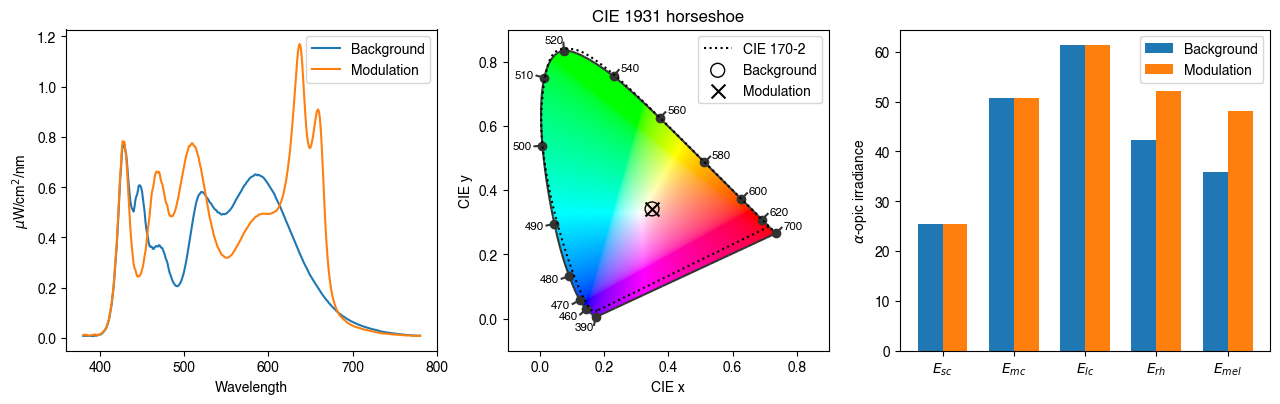

In [3]:
ssp.target_contrast = 'max'
ssp.print_problem()

# Find solution
solution = ssp.optim_solve(**{'options':{'disp':False}})

# Plot solution
_ = ssp.plot_solution(solution.x)

# Show device settings
print(f' Background settings: {ssp.w2s(solution.x[0:ssp.nprimaries])}')
print(f' Modulation settings: {ssp.w2s(solution.x[ssp.nprimaries:])}')

In [4]:
ssp.print_photoreceptor_contrasts(solution.x)

sc     0.000099
mc     0.000282
lc    -0.000058
rh     0.232616
mel    0.336895
dtype: float64



### Specifying a background spectrum

Note that in the above examples, both the background and modulation spectra were optimised. However, It often makes sense to stick with a specific background spectrum, particularly if you plan on targeting different photoreceptors in the same experiment. If you specify a background spectrum, `.optim_solve()` will only optimize the modulation spectrum. 

************************************************************
*************** Silent Substitution Problem ****************
************************************************************
Device: STLAB_1 (binocular, left eye)
Observer: ColorimetricObserver(age=32, field_size=10)
Ignoring: ['rh']
Minimising: ['sc', 'mc', 'lc']
Modulating: ['mel']
Target contrast: [inf]
Background: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


~~~~~~~~~~~~~~~~~~~~~~~ optim_solve ~~~~~~~~~~~~~~~~~~~~~~~~
> Aiming to maximise contrast.
> Performing local optimization with SLSQP.
 Background settings: [2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047]
 Modulation settings: [1889, 1820, 3250, 1213, 4016, 0, 2638, 1260, 4077, 3989]


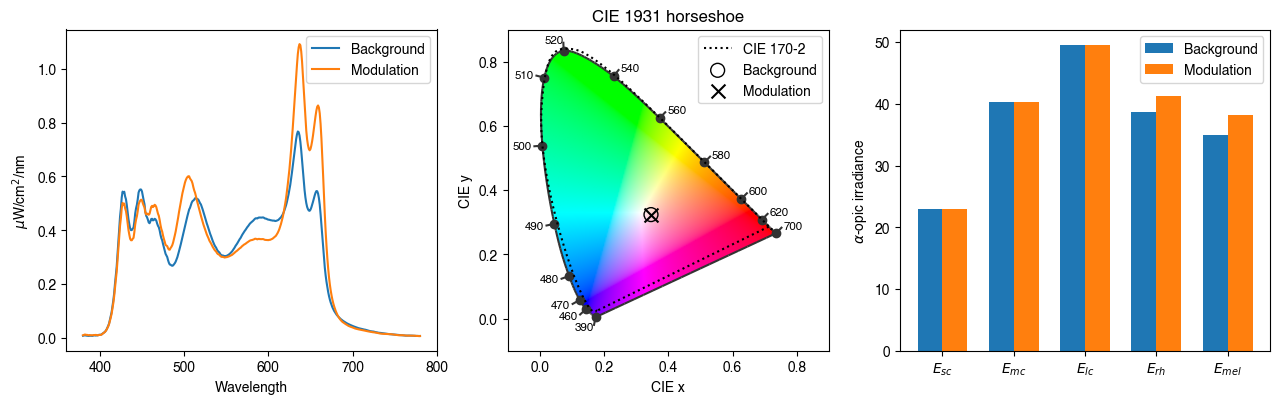

In [5]:
ssp.background = [.5] * ssp.nprimaries  # All primaries, half-max
ssp.target_contrast = 'max'
ssp.print_problem()
solution = ssp.optim_solve(**{'options':{'disp':False}})

# Plot solution
_ = ssp.plot_solution(solution.x)

# Show device settings
print(f' Background settings: {ssp.w2s(ssp.background)}')
print(f' Modulation settings: {ssp.w2s(solution.x)}')


In [6]:
ssp.print_photoreceptor_contrasts(solution.x)

sc     0.000106
mc     0.000006
lc    -0.000017
rh     0.069045
mel    0.092677
dtype: float64


Note that pinning a background spectrum is a big constraint on the optimisation and is why in this case we only got about 9% contrast on melanopsin.


Local vs. global optimisation
-----------------------------

By default, `.optim_solve()` uses *Scipy's* `minimize` function, which is a *local* minimizer. It starts with an initial random guess (unless told otherwise) for the primary inputs and works from that point to minimize the objective function (which in this case was to maximize contrast). 

Due to the random nature of the starting point in the function landscape, the minimum it finds is unlikely to be the global minimum. 

If you have enough time, you can tell `.optim_solve()` to search for the global minimum, in which case it will use *Scipy's* `basinhopping` algorithm to perform a series of local optimisations in conjunction with a global stepping algorithm and return the best solution.


************************************************************
*************** Silent Substitution Problem ****************
************************************************************
Device: STLAB_1 (binocular, left eye)
Observer: ColorimetricObserver(age=32, field_size=10)
Ignoring: ['rh']
Minimising: ['sc', 'mc', 'lc']
Modulating: ['mel']
Target contrast: [inf]
Background: None


~~~~~~~~~~~~~~~~~~~~~~~ optim_solve ~~~~~~~~~~~~~~~~~~~~~~~~
> No background specified, will optimise background.
> Aiming to maximise contrast.
> Performing global optimization with basinhopping and SLSQP
basinhopping step 0: f -0.641801
basinhopping step 1: f -1.04344 trial_f -1.04344 accepted 1  lowest_f -1.04344
found new global minimum on step 1 with function value -1.04344
basinhopping step 2: f -1.04095 trial_f -1.04095 accepted 1  lowest_f -1.04344
basinhopping step 3: f -1.58638 trial_f -1.58638 accepted 1  lowest_f -1.58638
found new global minimum on step 3 with function value -1.58638
basinhoppin

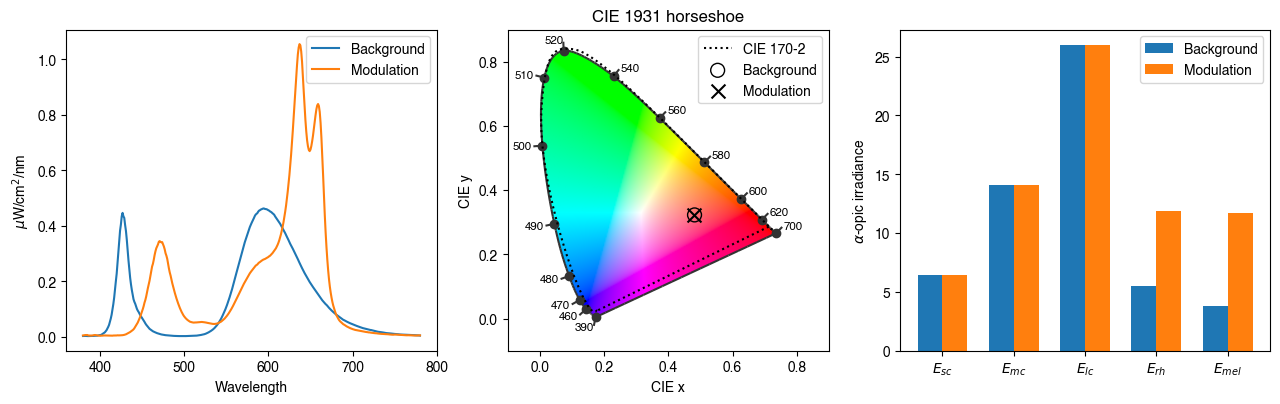

In [7]:
ssp.background = None
ssp.print_problem()
solution = ssp.optim_solve(global_search=True, niter=10)

# Plot solution
_ = ssp.plot_solution(solution.x)

# Show device settings
print(f' Background settings: {ssp.w2s(solution.x[0:ssp.nprimaries])}')
print(f' Modulation settings: {ssp.w2s(solution.x[ssp.nprimaries:])}')

In [8]:
ssp.print_photoreceptor_contrasts(solution.x)

sc     0.000016
mc     0.000909
lc    -0.000166
rh     1.145618
mel    2.083429
dtype: float64


208% melanopic contrast!